<a href="https://colab.research.google.com/github/swapnil6969/summer-of-code-2023/blob/main/price_model_smartwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/swapnil6969/summer-of-code-2023/main/machine-learning/week1/Fitness_trackers_updated.csv'
df = pd.read_csv(url)

In [ ]:
df

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
605,Fire-Boltt,Smartwatch,Talk Bluetooth,"Black, Grey, Green","3,499","9,999",HD Display,4.1,Silicone,10,923
606,Fire-Boltt,Smartwatch,Almighty,Orange,"4,999","14,999",AMOLED Display,4.1,Silicone,10,212
607,Fire-Boltt,Smartwatch,Mercury,Red,"2,999","7,999",HD Display,4.0,Silicone,8,4941
608,Fire-Boltt,Smartwatch,Spin,White,"5,846","5,999",TFT-LCD Display,2.4,Silicone,5,15


Converting columns 'Selling Price' and 'Original Price' from ```str``` to ```int```

In [ ]:
sellingPrice=[]
for price_str in df['Selling Price']:
    if len(price_str)>3 and len(price_str)<=6:
        price=price_str[-5::-1][::-1]+price_str[-3:]
    if len(price_str)>6:
        price=price_str[0]+price_str[2:4]+price_str[5:8]
    sellingPrice.append(int(price))

orgPrice=[]
for price_str in df['Original Price']:
    if len(price_str)>3 and len(price_str)<=6:
        price=price_str[-5::-1][::-1]+price_str[-3:]
    if len(price_str)>6:
        price=price_str[0]+price_str[2:4]+price_str[5:8]
    orgPrice.append(int(price))

df['Selling Price']=sellingPrice
df['Original Price']=orgPrice

Dropping the column 'Reviews'

In [ ]:
df['Reviews'].isna().sum()

496

In [ ]:
df.drop(['Reviews'], axis=1, inplace=True)

In [ ]:
df['Brand Name'].value_counts().index

Index(['FOSSIL ', 'GARMIN ', 'APPLE', 'FitBit', 'SAMSUNG ', 'huami', 'Huawei',
       'Noise ', 'Honor', 'Fire-Boltt', 'realme', 'Zebronics', 'Xiaomi',
       'Crossbeats', 'Fastrack', 'boAt ', 'Ptron', 'GOQii', 'OnePlus ', 'Oppo',
       'Noise', 'LCARE', 'dizo by realme ', 'LAVA', 'Infinix'],
      dtype='object')

NaN values in column 'Rating (Out of 5)' is replaced by $median$.

In [ ]:
replace_rating=df.loc[df['Brand Name']=='GARMIN ']['Rating (Out of 5)'].median()
replace_rating

4.2

In [ ]:
df.loc[df['Rating (Out of 5)'].isna()==True, 'Rating (Out of 5)']=df.loc[df['Rating (Out of 5)'].isna()==True, 'Rating (Out of 5)'].fillna(replace_rating)

Checking if there is any NaN value

In [ ]:
df.isna().sum()

Brand Name                         0
Device Type                        0
Model Name                         0
Color                              0
Selling Price                      0
Original Price                     0
Display                            0
Rating (Out of 5)                 56
Strap Material                     0
Average Battery Life (in days)     0
dtype: int64

Clearly 'Smartwatch' are more expensive than 'FitnessBand'.

In [ ]:
df.loc[df['Device Type']=='FitnessBand']['Original Price'].describe()

count       77.000000
mean      7239.428571
std       6210.942126
min       1599.000000
25%       2999.000000
50%       3999.000000
75%      10999.000000
max      38500.000000
Name: Original Price, dtype: float64

In [ ]:
df.loc[df['Device Type']=='Smartwatch']['Original Price'].describe()

count       533.000000
mean      26395.574109
std       20424.333471
min        1995.000000
25%       12999.000000
50%       20900.000000
75%       33900.000000
max      122090.000000
Name: Original Price, dtype: float64

In [ ]:
df['Display'].value_counts()

AMOLED Display         360
OLED Retina Display     86
OLED Display            43
TFT-LCD Display         32
LED Display             28
LCD Display             25
PMOLED Display          20
IPS Display              8
HD Display               8
Name: Display, dtype: int64

In [ ]:
for disp_tech in df['Display'].value_counts().index:
  print(disp_tech, ':', df.loc[df['Display']==disp_tech]['Original Price'].mean(), df.loc[df['Display']==disp_tech]['Original Price'].median())

AMOLED Display : 21219.838888888888 17999.0
OLED Retina Display : 51127.441860465115 49900.0
OLED Display : 23540.325581395347 14999.0
TFT-LCD Display : 3942.25 3349.0
LED Display : 27934.64285714286 25490.0
LCD Display : 13119.84 7990.0
PMOLED Display : 10331.95 10999.0
IPS Display : 9749.0 9999.0
HD Display : 7124.0 6999.0


In [ ]:
df.loc[df['Strap Material']==('leather'), 'Strap Material']='Leather'

In [ ]:
df.loc[df['Strap Material']=='Leather ', 'Strap Material']='Leather'

In [ ]:
for strap in df['Strap Material'].value_counts().index:
  print(strap, ':', df.loc[df['Strap Material']==strap]['Original Price'].mean(), df.loc[df['Strap Material']==strap]['Original Price'].median())

Silicone : 19167.92962962963 15997.0
Stainless Steel : 30498.59793814433 19995.0
Leather : 25239.52380952381 15999.0
Aluminium : 40885.61403508772 40900.0
Elastomer : 24542.68888888889 22999.0
Thermoplastic polyurethane : 6223.171428571429 4999.0
Plastic : 3280.3125 2999.0
Rubber : 15405.57142857143 12937.5
Nylon : 79842.33333333333 87590.0
Fabric : 23499.0 23499.0


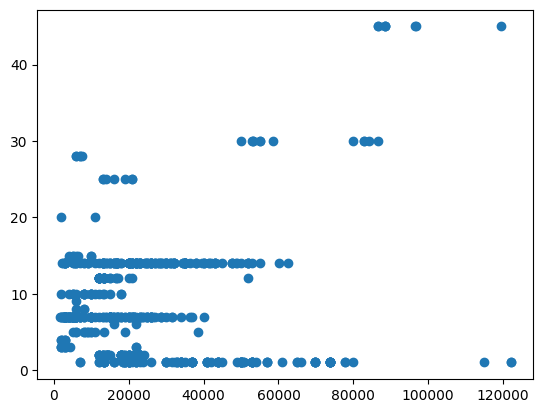

In [ ]:
plt.scatter(df['Original Price'], df['Average Battery Life (in days)'])

In [ ]:
df_for_model = df.drop(['Color', 'Selling Price', 'Rating (Out of 5)', 'Strap Material', 'Average Battery Life (in days)', 'Model Name'], axis=1)
df_for_model

,Brand Name,Device Type,Original Price,Display
0,Xiaomi,FitnessBand,2999,AMOLED Display
1,Xiaomi,FitnessBand,2499,AMOLED Display
2,Xiaomi,FitnessBand,2099,LCD Display
3,Xiaomi,FitnessBand,2999,AMOLED Display
4,Xiaomi,FitnessBand,2199,OLED Display
...,...,...,...,...
605,Fire-Boltt,Smartwatch,9999,HD Display
606,Fire-Boltt,Smartwatch,14999,AMOLED Display
607,Fire-Boltt,Smartwatch,7999,HD Display
608,Fire-Boltt,Smartwatch,5999,TFT-LCD Display


In [ ]:
dummy_brand = pd.get_dummies(df['Brand Name'])
dummy_type = pd.get_dummies(df['Device Type'])
dummy_display = pd.get_dummies(df['Display'])
dummy_display

,AMOLED Display,HD Display,IPS Display,LCD Display,LED Display,OLED Display,OLED Retina Display,PMOLED Display,TFT-LCD Display
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
605,0,1,0,0,0,0,0,0,0
606,1,0,0,0,0,0,0,0,0
607,0,1,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,1


In [ ]:
df_for_model.rename(columns={'Original Price':'Price'}, inplace=True)

In [ ]:
df_for_model

,Brand Name,Device Type,Price,Display
0,Xiaomi,FitnessBand,2999,AMOLED Display
1,Xiaomi,FitnessBand,2499,AMOLED Display
2,Xiaomi,FitnessBand,2099,LCD Display
3,Xiaomi,FitnessBand,2999,AMOLED Display
4,Xiaomi,FitnessBand,2199,OLED Display
...,...,...,...,...
605,Fire-Boltt,Smartwatch,9999,HD Display
606,Fire-Boltt,Smartwatch,14999,AMOLED Display
607,Fire-Boltt,Smartwatch,7999,HD Display
608,Fire-Boltt,Smartwatch,5999,TFT-LCD Display


In [ ]:
df_for_model = pd.concat([df_for_model,  dummy_brand, dummy_type, dummy_display], axis='columns')
df_for_model

,Brand Name,Device Type,Price,Display,APPLE,Crossbeats,FOSSIL,Fastrack,Fire-Boltt,FitBit,...,Smartwatch,AMOLED Display,HD Display,IPS Display,LCD Display,LED Display,OLED Display,OLED Retina Display,PMOLED Display,TFT-LCD Display
0,Xiaomi,FitnessBand,2999,AMOLED Display,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Xiaomi,FitnessBand,2499,AMOLED Display,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Xiaomi,FitnessBand,2099,LCD Display,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Xiaomi,FitnessBand,2999,AMOLED Display,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Xiaomi,FitnessBand,2199,OLED Display,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Fire-Boltt,Smartwatch,9999,HD Display,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
606,Fire-Boltt,Smartwatch,14999,AMOLED Display,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
607,Fire-Boltt,Smartwatch,7999,HD Display,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
608,Fire-Boltt,Smartwatch,5999,TFT-LCD Display,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_for_model.drop(['Brand Name', 'Xiaomi', 'Device Type', 'FitnessBand', 'Display', 'HD Display'], axis=1, inplace=True)

In [ ]:
df_for_model.columns

Index(['Price', 'APPLE', 'Crossbeats', 'FOSSIL ', 'Fastrack', 'Fire-Boltt',
       'FitBit', 'GARMIN ', 'GOQii', 'Honor', 'Huawei', 'Infinix', 'LAVA',
       'LCARE', 'Noise', 'Noise ', 'OnePlus ', 'Oppo', 'Ptron', 'SAMSUNG ',
       'Zebronics', 'boAt ', 'dizo by realme ', 'huami', 'realme',
       'Smartwatch', 'AMOLED Display', 'IPS Display', 'LCD Display',
       'LED Display', 'OLED Display', 'OLED Retina Display', 'PMOLED Display',
       'TFT-LCD Display'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lin_reg = LinearRegression()
model_lin_reg.fit(df_for_model.drop(['Price'], axis=1).values, df_for_model.Price)

y_predict = model_lin_reg.predict(df_for_model.drop(['Price'], axis=1).values)
rmse_lin_reg = mean_squared_error(df_for_model.Price, y_predict, squared=False)

rmse_lin_reg

12586.346027157591

In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(df_for_model.drop(['Price'], axis=1).values, df_for_model.Price)

y_predict_sv = model_svr.predict(df_for_model.drop(['Price'], axis=1).values)
rmse_sv = mean_squared_error(df_for_model.Price, y_predict_sv, squared=False)

rmse_sv

20804.292700720143

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_for_reg = RandomForestRegressor(n_estimators=300)
model_for_reg.fit(df_for_model.drop(['Price'], axis=1).values, df_for_model.Price)

y_predict_for = model_for_reg.predict(df_for_model.drop(['Price'], axis=1).values)
rmse_for = mean_squared_error(df_for_model.Price, y_predict_for, squared=False)

rmse_for

12490.400268632273

In [ ]:
df.values[:5,:]

array([['Xiaomi', 'FitnessBand', 'Smart Band 5', 'Black', 2499, 2999,
        'AMOLED Display', 4.1, 'Thermoplastic polyurethane', 14],
       ['Xiaomi', 'FitnessBand', 'Smart Band 4', 'Black', 2099, 2499,
        'AMOLED Display', 4.2, 'Thermoplastic polyurethane', 14],
       ['Xiaomi', 'FitnessBand', 'HMSH01GE', 'Black', 1722, 2099,
        'LCD Display', 3.5, 'Leather', 14],
       ['Xiaomi', 'FitnessBand', 'Smart Band 5', 'Black', 2469, 2999,
        'AMOLED Display', 4.1, 'Thermoplastic polyurethane', 14],
       ['Xiaomi', 'FitnessBand', 'Band 3', 'Black', 1799, 2199,
        'OLED Display', 4.3, 'Plastic', 7]], dtype=object)

In [ ]:
model_for_reg.predict(df_for_model.values[:5,1:])

array([2842.06786251, 2842.06786251, 2387.50698413, 2842.06786251,
       2060.5328836 ])